In [80]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
RESULTS_PATH = "/work/users/d/j/djpassey/interfere_exp6.1/stochastic_sweep_studies.pkl"
with open(RESULTS_PATH, "rb") as f:
    results = pickle.load(f)

/nas/longleaf/home/djpassey/.conda/envs/interfere_exp5/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
studies, imgs = results["studies"], results["imgs"]

In [13]:
METHODS = list(studies.keys())

METRIC_NAMES = [
    "train_vpt", "train_rmse", "train_dir_ch",
    "forecast_vpt", "forecast_rmse", "forecast_dir_ch",
    "interv_vpt", "interv_rmse", "interv_dir_ch"
]

In [36]:
row_list = []

for method in METHODS:
    for model in studies[method].keys():
        study = studies[method][model]
        
        trials = studies[method][model].trials
        model_name, sigma_str = model.split("(")
        sigma = float(sigma_str.split("=")[1].split(")")[0])
        
        study_rows = [
            [method, model_name, sigma, trial.number] + trial.values 
            for trial in trials if trial.values
        ]
        row_list += study_rows

In [37]:
# Make data frame
df = pd.DataFrame(row_list, columns=["Method", "Model", "Sigma", "Number"] + METRIC_NAMES)

# Log transform rmse columns.

for metric in ["train_rmse", "forecast_rmse", "interv_rmse"]:
    df[metric] = np.log(df[metric])
    
# Threshold by a max log error.

MAX_ERROR = 10

threshold_df = df[
    (df["train_rmse"] < MAX_ERROR) &
    (df["forecast_rmse"] < MAX_ERROR) &
    (df["interv_rmse"] < MAX_ERROR)
]

# Rename rmse metric cols to log_rmse
threshold_df.rename(columns={
    "train_rmse": "train_log_rmse",
    "forecast_rmse": "forecast_log_rmse",
    "interv_rmse": "interv_log_rmse"
}, inplace=True)

print(
    len(df) - len(threshold_df),
    " / ", len(df),
    " Rows Removed Due to Too Large Error"
)

198  /  1640  Rows Removed Due to Too Large Error


/tmp/ipykernel_1941921/818019267.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threshold_df.rename(columns={


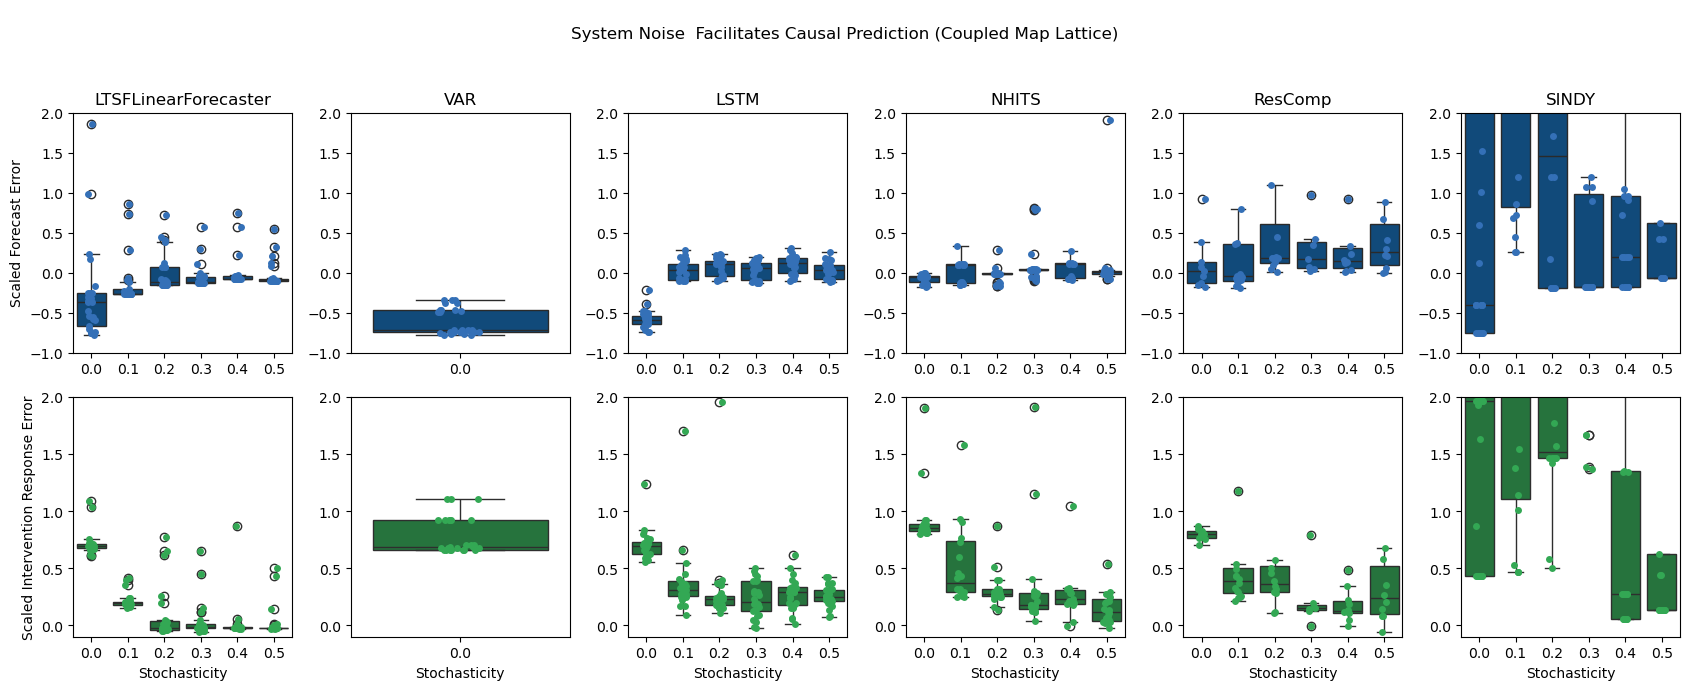

In [111]:

fig, ax = plt.subplots(2, len(METHODS), figsize=(17, 7))

for i, method in enumerate(METHODS):
    
    ax[0, i].set_title(method)
    
    sns.boxplot(
        data=threshold_df[
            (threshold_df.Method == method) &
            (threshold_df.Model == "coupled_logistic_map")
        ],
        x="Sigma",
        y="forecast_log_rmse",
        ax=ax[0, i],
        color="#004C8B"
    )
    sns.stripplot(
        data=threshold_df[
            (threshold_df.Method == method) &
            (threshold_df.Model == "coupled_logistic_map")
        ],
        x="Sigma",
        y="forecast_log_rmse",
        ax=ax[0, i],
        color="#3470B7"
    )
    
    if i != 0:
        ax[0, i].set_ylabel(None)
    else:
        ax[0, 0].set_ylabel("Scaled Forecast Error")
        
    ax[0, i].set_xlabel(None)
    ax[0, i].set_ylim(-1, 2)
    
    sns.boxplot(
        data=threshold_df[
            (threshold_df.Method == method) &
            (threshold_df.Model == "coupled_logistic_map")
        ],
        x="Sigma",
        y="interv_log_rmse",
        ax=ax[1, i],
        color="#198038",
    )
    sns.stripplot(
        data=threshold_df[
            (threshold_df.Method == method) &
            (threshold_df.Model == "coupled_logistic_map")
        ],
        x="Sigma",
        y="interv_log_rmse",
        ax=ax[1, i],
        color="#33A854",
    )
    
    ax[1, i].set_ylim(-0.1, 2)
    ax[1, i].set_xlabel("Stochasticity")

    
    if i != 0:
        ax[1, i].set_ylabel(None)
    else:
         ax[1, 0].set_ylabel("Scaled Intervention Response Error")
            

plt.suptitle("\nSystem Noise  Facilitates Causal Prediction (Coupled Map Lattice)\n\n")
plt.tight_layout()
plt.show()

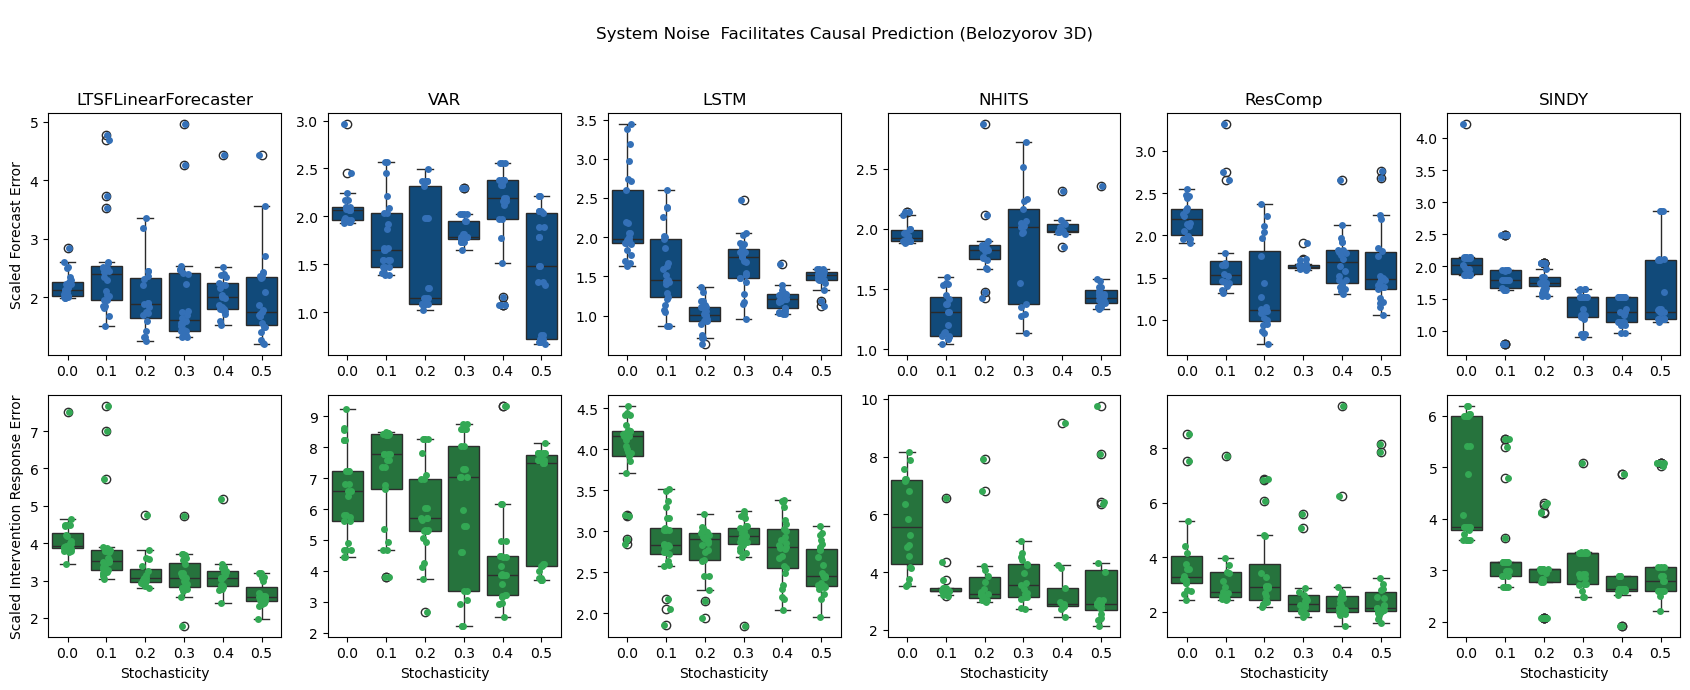

In [113]:

fig, ax = plt.subplots(2, len(METHODS), figsize=(17, 7))

for i, method in enumerate(METHODS):
    
    ax[0, i].set_title(method)
    
    sns.boxplot(
        data=threshold_df[
            (threshold_df.Method == method) &
            (threshold_df.Model == "Belozyorov3DQuad")
        ],
        x="Sigma",
        y="forecast_log_rmse",
        ax=ax[0, i],
        color="#004C8B"
    )
    sns.stripplot(
        data=threshold_df[
            (threshold_df.Method == method) &
            (threshold_df.Model == "Belozyorov3DQuad")
        ],
        x="Sigma",
        y="forecast_log_rmse",
        ax=ax[0, i],
        color="#3470B7"
    )
    
    if i != 0:
        ax[0, i].set_ylabel(None)
    else:
        ax[0, 0].set_ylabel("Scaled Forecast Error")
        
    ax[0, i].set_xlabel(None)
    #ax[0, i].set_ylim(-1, 2)
    
    sns.boxplot(
        data=threshold_df[
            (threshold_df.Method == method) &
            (threshold_df.Model == "Belozyorov3DQuad")
        ],
        x="Sigma",
        y="interv_log_rmse",
        ax=ax[1, i],
        color="#198038",
    )
    sns.stripplot(
        data=threshold_df[
            (threshold_df.Method == method) &
            (threshold_df.Model == "Belozyorov3DQuad")
        ],
        x="Sigma",
        y="interv_log_rmse",
        ax=ax[1, i],
        color="#33A854",
    )
    
    #ax[1, i].set_ylim(-0.1, 2)
    ax[1, i].set_xlabel("Stochasticity")

    
    if i != 0:
        ax[1, i].set_ylabel(None)
    else:
         ax[1, 0].set_ylabel("Scaled Intervention Response Error")
            

plt.suptitle("\nSystem Noise  Facilitates Causal Prediction (Belozyorov 3D)\n\n")
plt.tight_layout()
plt.show()

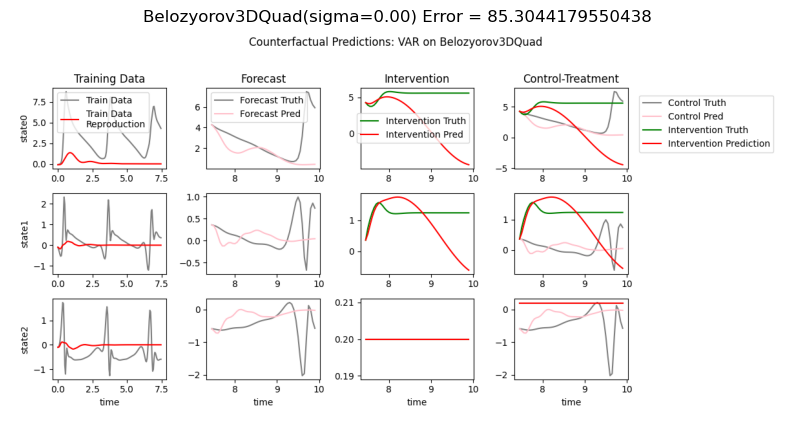

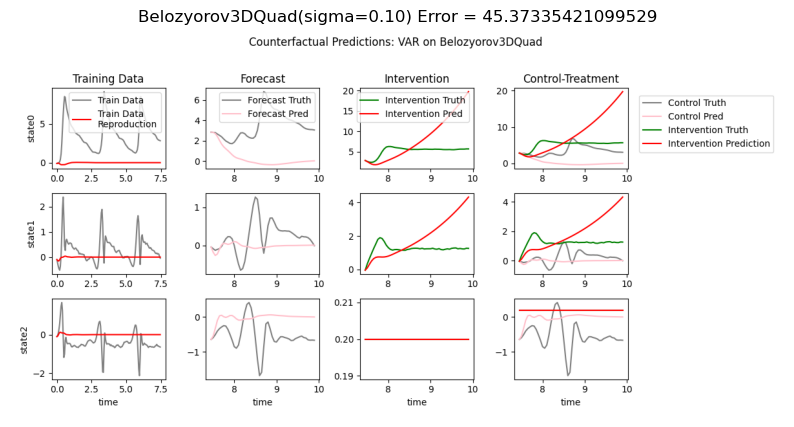

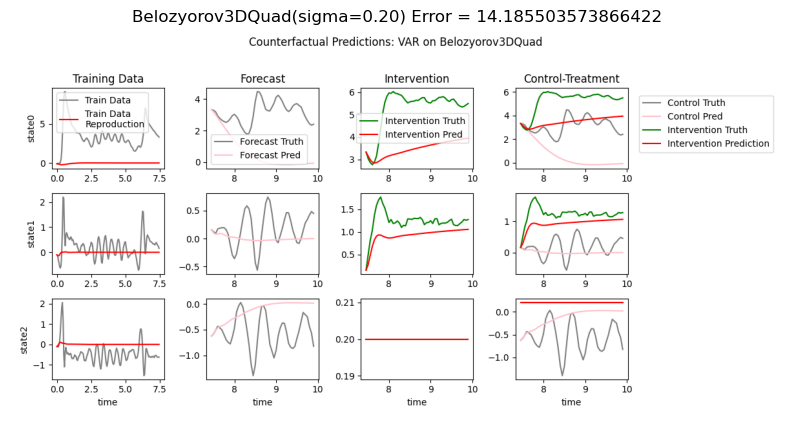

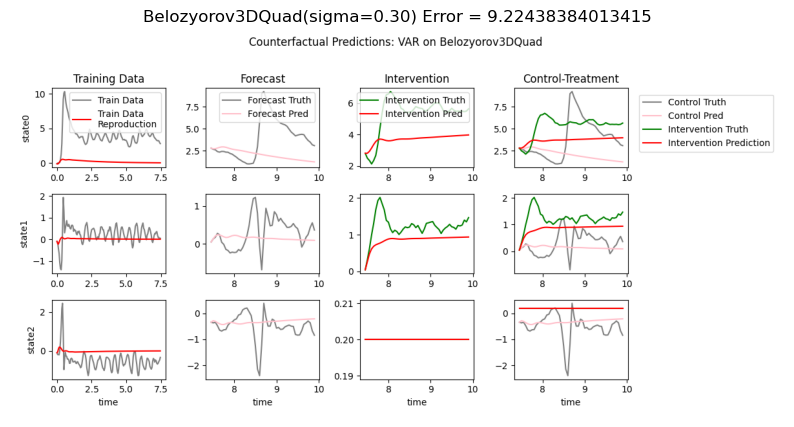

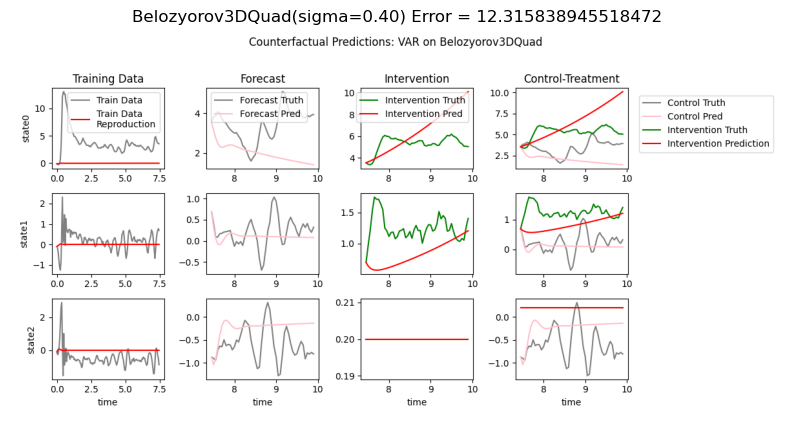

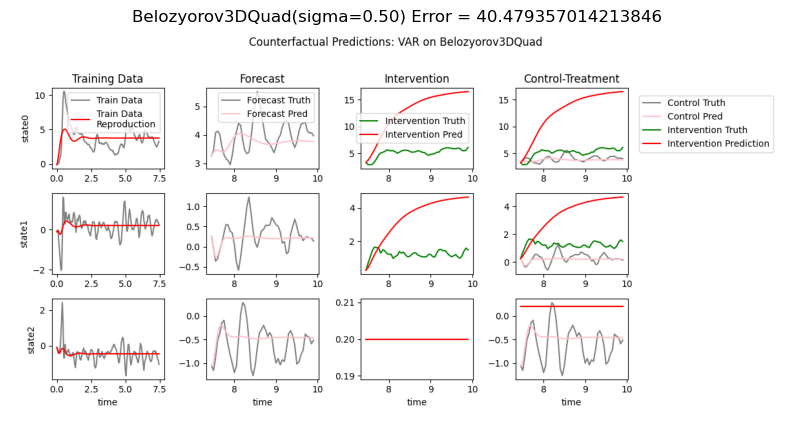

In [79]:
method = "VAR"
metric_idx = 7

for model in belozy_models:
    
    study = studies[method][model]
    trial_with_lowest_err = min(study.trials, key=lambda t: t.values[metric_idx])
    num = trial_with_lowest_err.number
    fig, ax = plt.subplots(figsize=(10, 17))
    plt.imshow(imgs[method][model][num])
    plt.axis('off')
    plt.title(model + f" Error = {trial_with_lowest_err.values[metric_idx]}")
    plt.show()